# AC Optics

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from analysis import *
import glob
import re
import hvplot.xarray
font = {'family':'serif',
        'weight': 'normal',
        'size': 32}
plt.rc('font',**font)
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#000000','#e3130f','#0962f6',
                                                    '#20c168','#fc76f3','#2efef4'])
plt.rc('text',usetex=True)

## Constants

In [4]:
mu0 = np.pi*4*1e-7
Ms = 0.93/mu0 # T
hbar = 1.055e-34
e = 1.6e-19
V = 1. #Vrms
R = 336.123 #ohms
w = 20e-4 #cm
t = 4e-7 #cm
A = w*t
I = V/R
J = I/A
tco = 1.15e-9
rho_co = 9.59e-8 #ohm m
rho_pt = 40e-8 #33.33e-8 #ohm m
R4pt = 1/(1/(rho_pt*80e-6/20e-6/4e-9) + 1/(rho_co*80e-6/20e-6/tco))
Isplit = rho_co*80e-6/20e-6/tco/(rho_pt*80e-6/20e-6/4e-9 + rho_co*80e-6/20e-6/tco)
t2xi = 2*e*Ms*tco/hbar/1e4

## OOP hyst

In [6]:
OOP = pd.read_csv('./C5R8_OOP_SagnacHeterodyne_V1.0000V_A0.0_2021-06-29_1.csv',comment='#')
# (m,b) = np.polyfit(OOP.sweep_field[:100],OOP.ThetaK[:100],1)
# OOP['ThetaK_corr'] = OOP['ThetaK'] - (m*OOP['sweep_field'])
OOP = OOP.set_index('sweep_field').drop(columns='elapsed_time').to_xarray()

0.43476915412113154


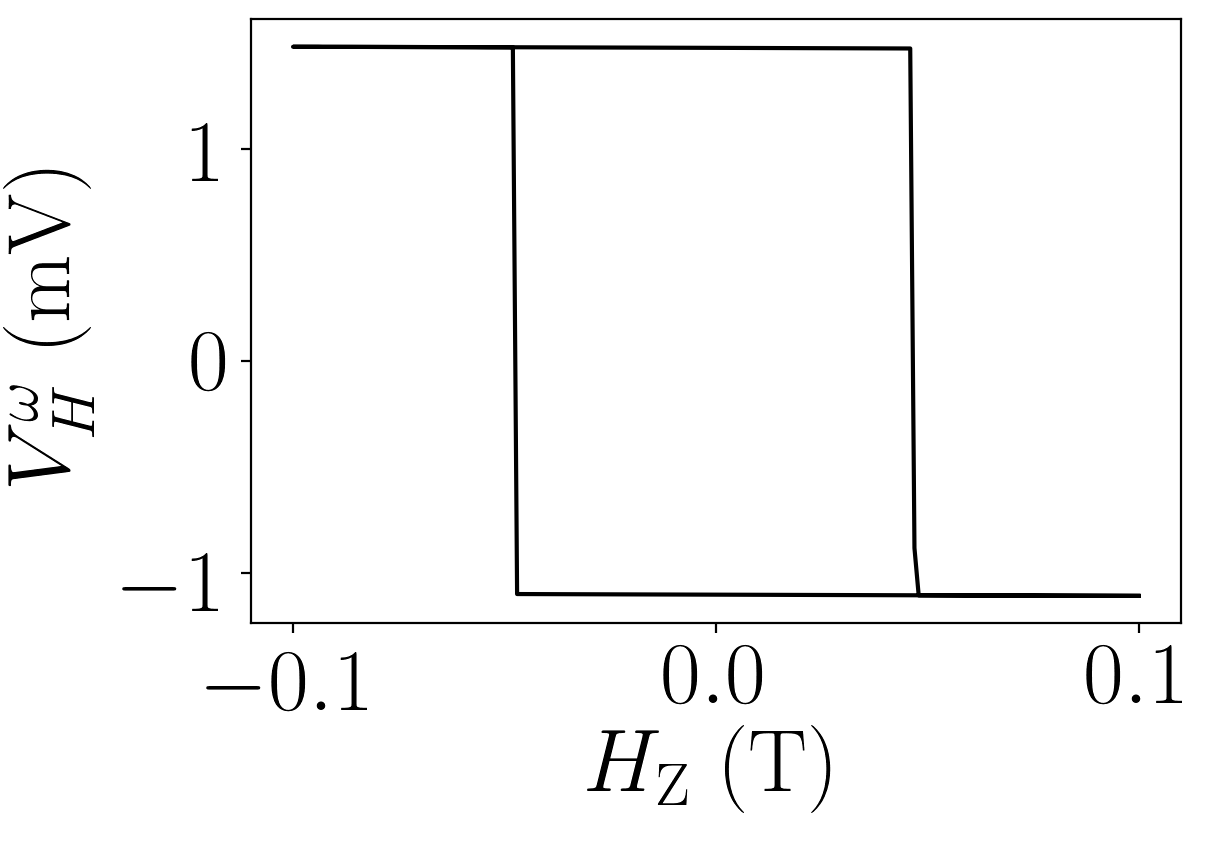

In [9]:
plt.figure(dpi=200)
plt.plot(OOP.sweep_field,OOP.TX1*1e3)
plt.ylabel('$V^{\\omega}_H$ (mV)')
plt.xlabel('$H_{\\rm{Z}}$ (T)')
plt.xticks([-0.1,0,0.1])
Mp = float(OOP.where(OOP.TX1*1e3 > 0).mean().TX1)
Mm = float(OOP.where(OOP.TX1*1e3 < 0).mean().TX1)
Vahe = (Mp - Mm)/2
Rahe = Vahe/I
print(Rahe) #ohms

## PHE

In [67]:
def find_field(f):
    z = re.compile('.*F(?P<B>\-?\d+\.\d+)T.*')
    return float(re.match(z,f)['B'])
def load_phe(f):
    return pd.read_csv(f,comment='#').set_index('field_azimuth').drop(columns='elapsed_time').to_xarray()
phe = combine_new_dim({find_field(f): load_phe(f) for f in glob.glob('./*PHE*V3.0V*.csv')}, 'field_strength')
# phe = phe.where(phe.field_azimuth>-10)

Text(0, 0.5, '$V^{\\omega}_{XY}$ (mV)')

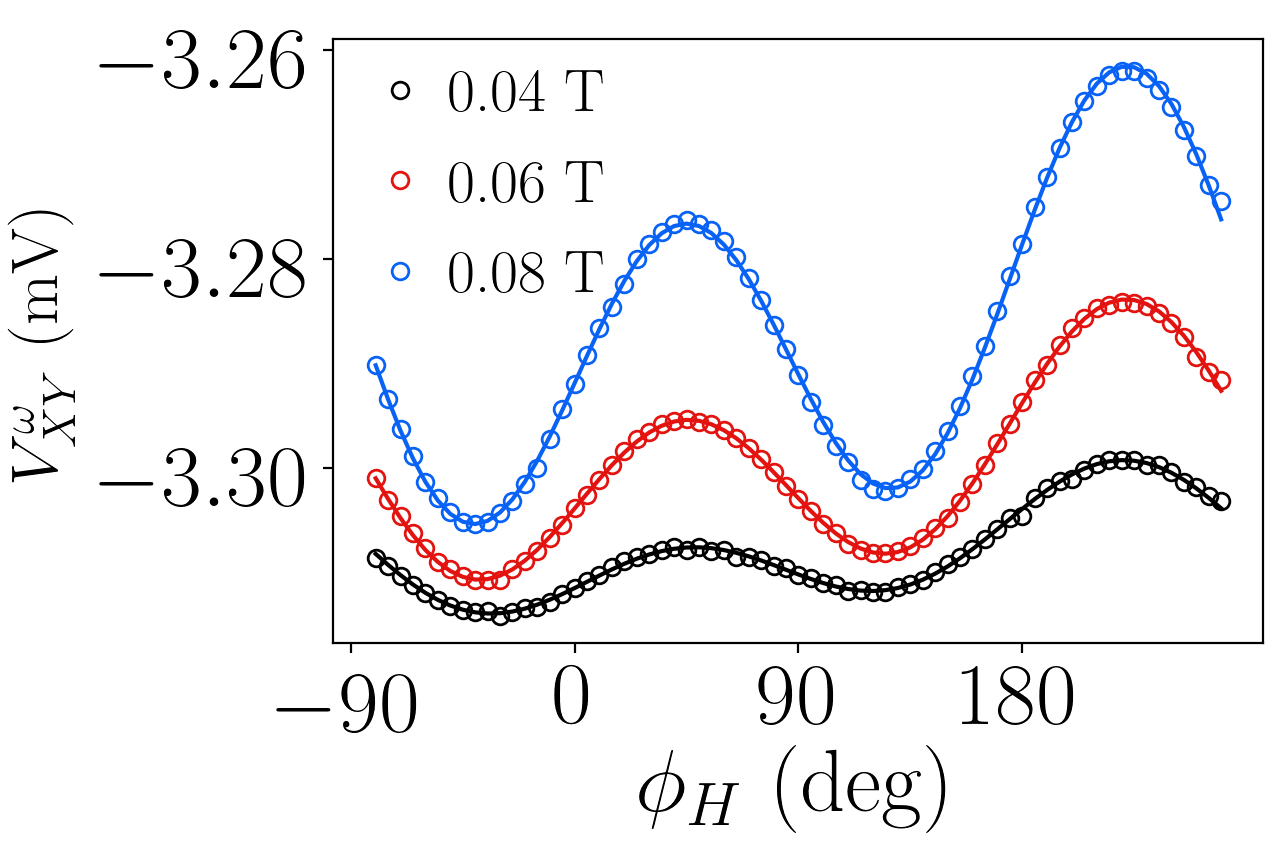

In [228]:
# plt.figure(dpi=200,figsize=(8,2))
plt.figure(dpi=200)
plt.errorbar(-(phe.field_azimuth-90),phe.sel(field_strength=0.04).TX1*1e3,fmt='o',
             fillstyle='none',label='0.04 T',color='C0')
plt.plot(-(phe.field_azimuth-90),w1full(phe.field_azimuth,phe_fit.sel(field_strength=0.04).phi0,
                                          phe_fit.sel(field_strength=0.04).phi02,
                                          phe_fit.sel(field_strength=0.04).a,
                                          phe_fit.sel(field_strength=0.04).b,
                                          phe_fit.sel(field_strength=0.04).c)*1e3,color='C0')
plt.errorbar(-(phe.field_azimuth-90),phe.sel(field_strength=0.06).TX1*1e3,fmt='o',
             fillstyle='none',label='0.06 T',color='C1')
plt.plot(-(phe.field_azimuth-90),w1full(phe.field_azimuth,phe_fit.sel(field_strength=0.06).phi0,
                                          phe_fit.sel(field_strength=0.06).phi02,
                                          phe_fit.sel(field_strength=0.06).a,
                                          phe_fit.sel(field_strength=0.06).b,
                                          phe_fit.sel(field_strength=0.06).c)*1e3,color='C1')
plt.errorbar(-(phe.field_azimuth-90),phe.sel(field_strength=0.08).TX1*1e3,fmt='o',
             fillstyle='none',label='0.08 T',color='C2')
plt.plot(-(phe.field_azimuth-90),w1full(phe.field_azimuth,phe_fit.sel(field_strength=0.08).phi0,
                                          phe_fit.sel(field_strength=0.08).phi02,
                                          phe_fit.sel(field_strength=0.08).a,
                                          phe_fit.sel(field_strength=0.08).b,
                                          phe_fit.sel(field_strength=0.08).c)*1e3,color='C2')
plt.legend(loc='upper left',bbox_to_anchor=(-0.02,1.05),ncol=1,frameon=False,
           columnspacing=0.5,handletextpad=0.3,handlelength=1,fontsize=22)
plt.xlabel('$\\phi_H$ (deg)')
plt.xticks([-90,0,90,180])
plt.ylabel('$V^{\\omega}_{XY}$ (mV)',fontsize=24)

Text(0, 0.5, '$V^{2\\omega}_{XY}$ ($\\mu$V)')

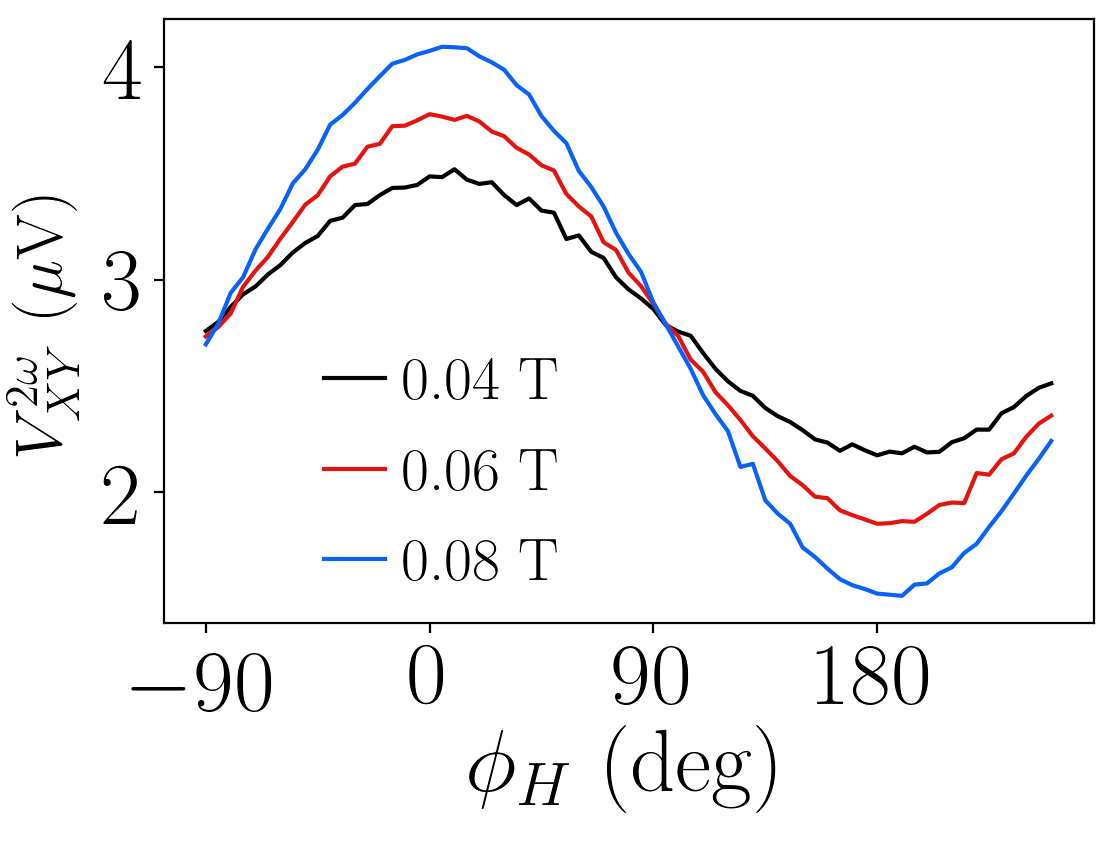

In [94]:
# plt.figure(dpi=200,figsize=(8,2))
plt.figure(dpi=200)
plt.plot(-(phe.field_azimuth-80),phe.sel(field_strength=0.04).TY2*1e6,label='0.04 T')
plt.plot(-(phe.field_azimuth-80),phe.sel(field_strength=0.06).TY2*1e6,label='0.06 T')
plt.plot(-(phe.field_azimuth-80),phe.sel(field_strength=0.08).TY2*1e6,label='0.08 T')
plt.legend(loc='lower center',bbox_to_anchor=(0.3,-0.04),ncol=1,frameon=False,
           columnspacing=0.5,handletextpad=0.3,handlelength=1,fontsize=22)
plt.xlabel('$\\phi_H$ (deg)')
plt.xticks([-90,0,90,180])
plt.ylabel('$V^{2\\omega}_{XY}$ ($\\mu$V)',fontsize=24)

In [187]:
Meff = 0.6318643922226775

In [213]:
def w1full(x,x0,x02,a,b,c):
    deg2rad = np.pi/180.
    
    return a/2*np.sin(2*deg2rad*(x-x0)) + b + c*np.cos(deg2rad*(x-x02))
def w1full_guess(*args,**kwargs):
    return [0,0,1e-3,1e-3,1]

phe_fit = fit_dataArray(phe.TX1,w1full,w1full_guess,['phi0','phi02','a','b','c'],
                        'field_azimuth',maxfev=10000)

/Users/sabakarimeddiny/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [236]:
3/R

0.00892530412973822

0.0018959828695221447


0.24267117357294105

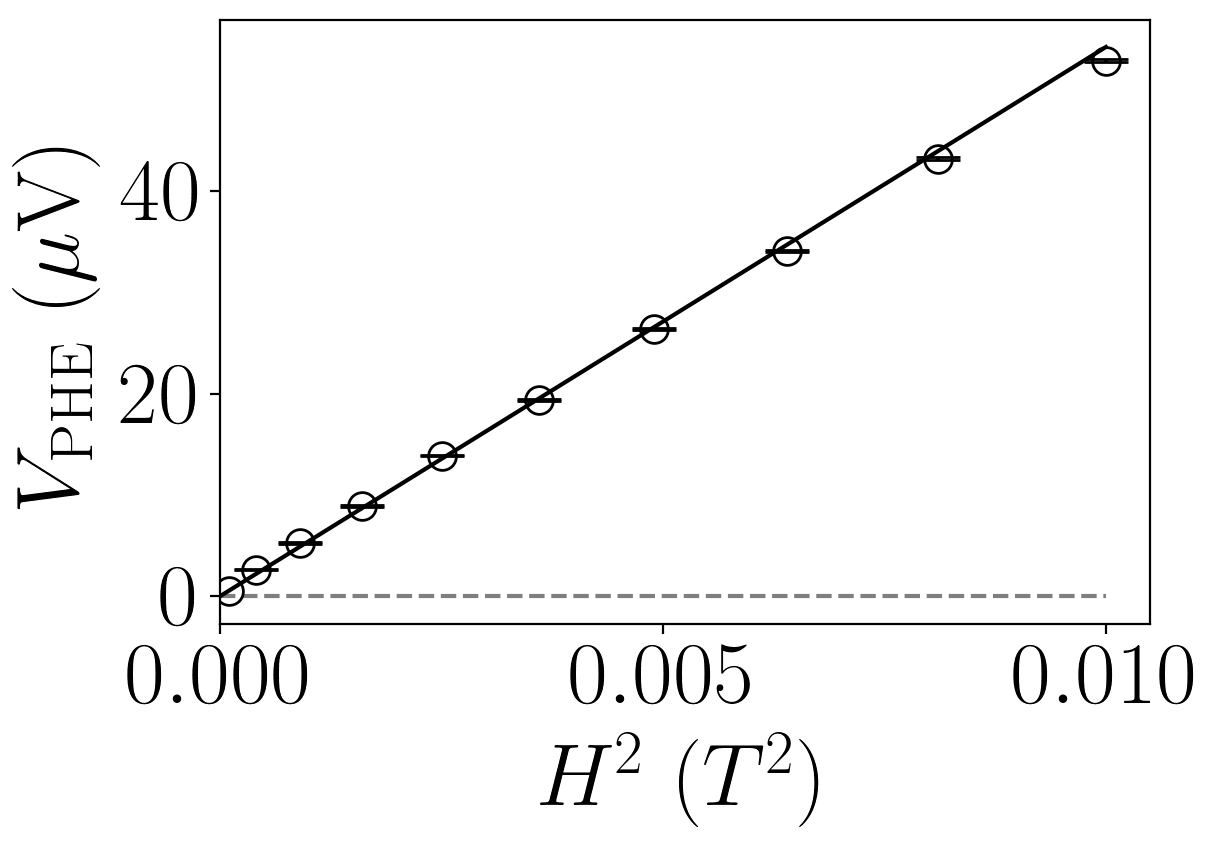

In [237]:
plt.figure(dpi=200)
plt.errorbar(phe_fit.field_strength**2,phe_fit.a*1e6,phe_fit.a_err*1e6,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0')
plt.plot([0,0.01],[0,0],'k--',alpha=0.5)
plt.xlim(0,)
plt.xlabel('$H^2$ ($T^2$)')
# plt.ylabel('$R_{\\rm{PHE}}\\sin^2\\left(H/\\mu_0 M_{\\rm{eff}}\\right)$ (m$\\Omega$)',fontsize=20)
plt.ylabel('$V_{\\rm{PHE}}$ ($\\mu$V)')
popt,pcov = np.polyfit(np.append([0],phe_fit.field_strength.values)**2,
                  np.append([0],phe_fit.a),1,
                  w=1/(np.append([1e-10],phe_fit.a_err)**2),cov=True)
plt.plot([0,0.01],np.polyval(popt,[0,0.01])*1e6)
plt.xticks([0,0.005,0.01])
Rphe = popt[0]/(3/R)*Meff**2#float(phe_fit.a/phe_fit.field_strength**2/I*xport_Meff**2)
print(np.sqrt(np.diag(pcov)[0])/(3/R)*Meff**2)#float(phe_fit.a/phe_fit.field_strength**2/I*xport_Meff**2)

Rphe


<xarray.DataArray ()>
array(-2.25112839)
<xarray.DataArray ()>
array(0.01950622)


/Users/sabakarimeddiny/opt/anaconda3/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: invalid value encountered in arcsin
  result_data = func(*input_data)


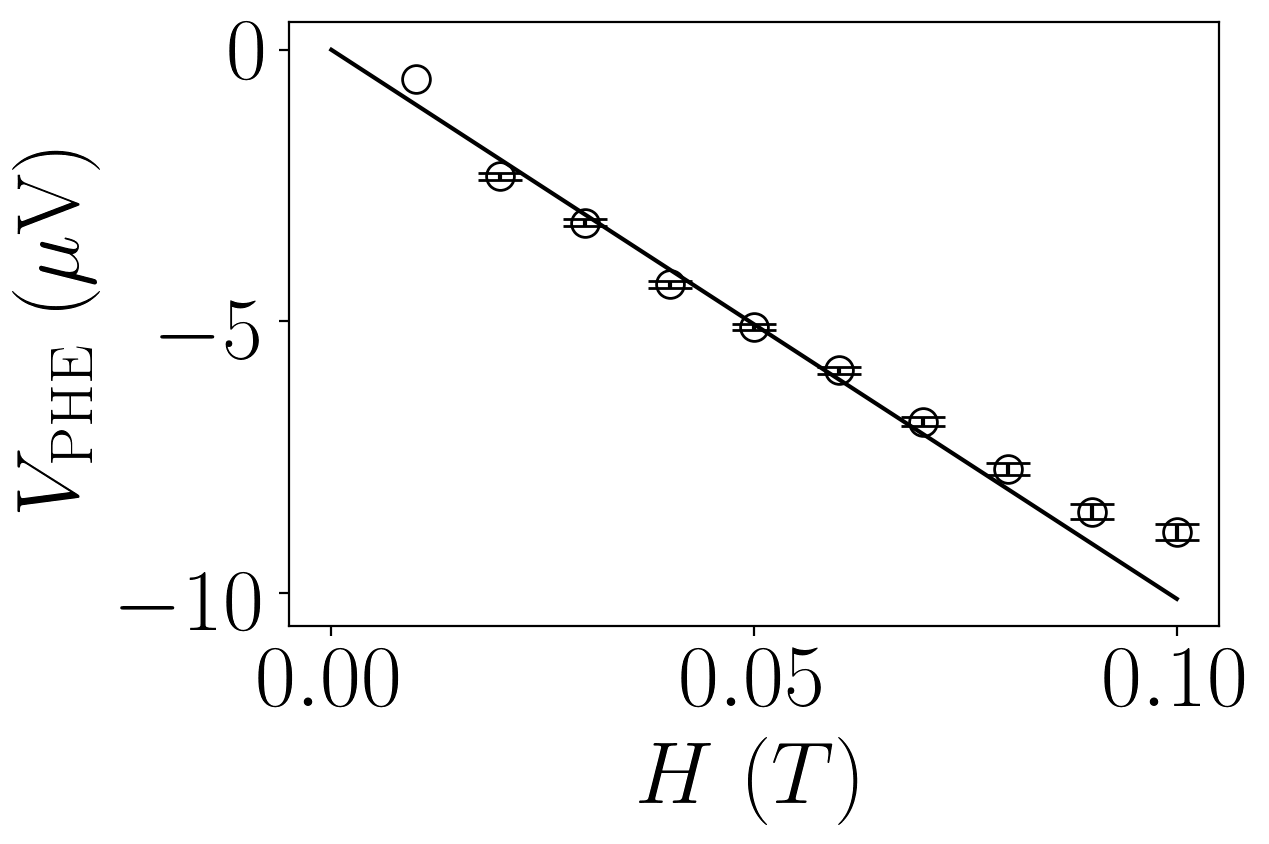

In [241]:
plt.figure(dpi=200)
plt.errorbar(phe_fit.field_strength,phe_fit.c*1e6,phe_fit.a_err*1e6,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0')
# plt.plot([0,0.1],[0,0],'k--',alpha=0.5)
# plt.xlim(0,)
plt.xlabel('$H$ ($T$)')
plt.ylabel('$V_{\\rm{PHE}}$ ($\\mu$V)')
popt = np.polyfit(np.append([0],phe_fit.field_strength.values),
                  np.append([0],phe_fit.c),1,
                  w=1/(np.append([1e-10],phe_fit.c_err)**2))
plt.plot([0,0.1],np.polyval(popt,[0,0.1])*1e6)
print(np.arcsin(phe_fit.c/(3/R)/Rahe/(phe_fit.field_strength*Meff)).mean()*180/np.pi)
print(np.arcsin(phe_fit.c_err/(3/R)/Rahe/(phe_fit.field_strength*Meff)).mean()*180/np.pi)

## Tilting

In [166]:
glob.glob('./*Meff*%0.4f**A90.0*.csv'%3)[0]

'./C5R8_Meff_SagnacHeterodyne_V3.0000V_A90.0_2021-06-29_2.csv'

In [167]:
def load_file(f):
    return pd.read_csv(f,comment='#').set_index('sweep_field').drop(columns='elapsed_time').to_xarray()
def load(v):
    ms = [1]
    angs = [90]
    m_dict = {}
    for m in ms:
        ang_dict={}
        for ang in angs:
            if m == 1 and ang == 0:
                f = glob.glob('./*Meff*%0.4f**A0.0*.csv'%v)[0]
                a = load_file(f)
            if m == 1 and ang == 90:
                f = glob.glob('./*Meff*%0.4f*A90.0*.csv'%v)[0]
                a = load_file(f)
            ang_dict[ang] = a
        m_dict[m] = combine_new_dim(ang_dict,'field_azimuth')
    return combine_new_dim(m_dict,'M')

In [168]:
a = load(3)
a['DeltaThetaK'] = a['DeltaThetaK']/2 #fixing the extra factor of two in the procedure code

In [169]:
a

<xarray.Dataset>
Dimensions:        (M: 1, field_azimuth: 1, sweep_field: 21)
Coordinates:
  * sweep_field    (sweep_field) float64 0.1 0.09 0.08 0.07 ... -0.08 -0.09 -0.1
  * field_azimuth  (field_azimuth) int64 90
  * M              (M) int64 1
Data variables:
    ThetaK         (M, field_azimuth, sweep_field) float64 -0.3272 ... -0.6109
    X1             (M, field_azimuth, sweep_field) float64 5.51e-07 ... 7.36e-07
    Y1             (M, field_azimuth, sweep_field) float64 -2.538e-06 ... -2....
    X2             (M, field_azimuth, sweep_field) float64 -2.223e-07 ... 2.8...
    Y2             (M, field_azimuth, sweep_field) float64 -3.9e-07 ... -1.45...
    DeltaThetaK    (M, field_azimuth, sweep_field) float64 -0.03596 ... -0.6826
    DeltaX1        (M, field_azimuth, sweep_field) float64 2.583e-08 ... 1.82...
    DeltaY1        (M, field_azimuth, sweep_field) float64 1.541e-08 ... -1.2...
    TX1            (M, field_azimuth, sweep_field) float64 -0.003278 ... -0.0...
    TY1            (M, field_azimuth, sweep_field) float64 0.0002207 ... 0.00...
    TX2            (M, field_azimuth, sweep_field) float64 8.555e-07 ... 7.93...
    TY2            (M, field_azimuth, sweep_field) float64 4.319e-06 ... 1.28...

In [151]:
def lin(x,m,b):
    return m*x+b
def lin_guess(*args,**kwargs):
    return [1,1]
def quad(x,a,b,c):
    return a*x**2 + b*x + c
def quad_guess(*args,**kwargs):
    return [1,1,1]

op_w1_fit = fit_dataArray(a.ThetaK,quad,quad_guess,['a','b','c'],'sweep_field')
op_w2_fit = fit_dataArray(a.DeltaThetaK,lin,lin_guess,['a','b'],'sweep_field')
xport_w1_fit = fit_dataArray(a.TX1,quad,quad_guess,['a','b','c'],'sweep_field')
xport_w2_fit = fit_dataArray(a.TY2,lin,lin_guess,['a','b'],'sweep_field')

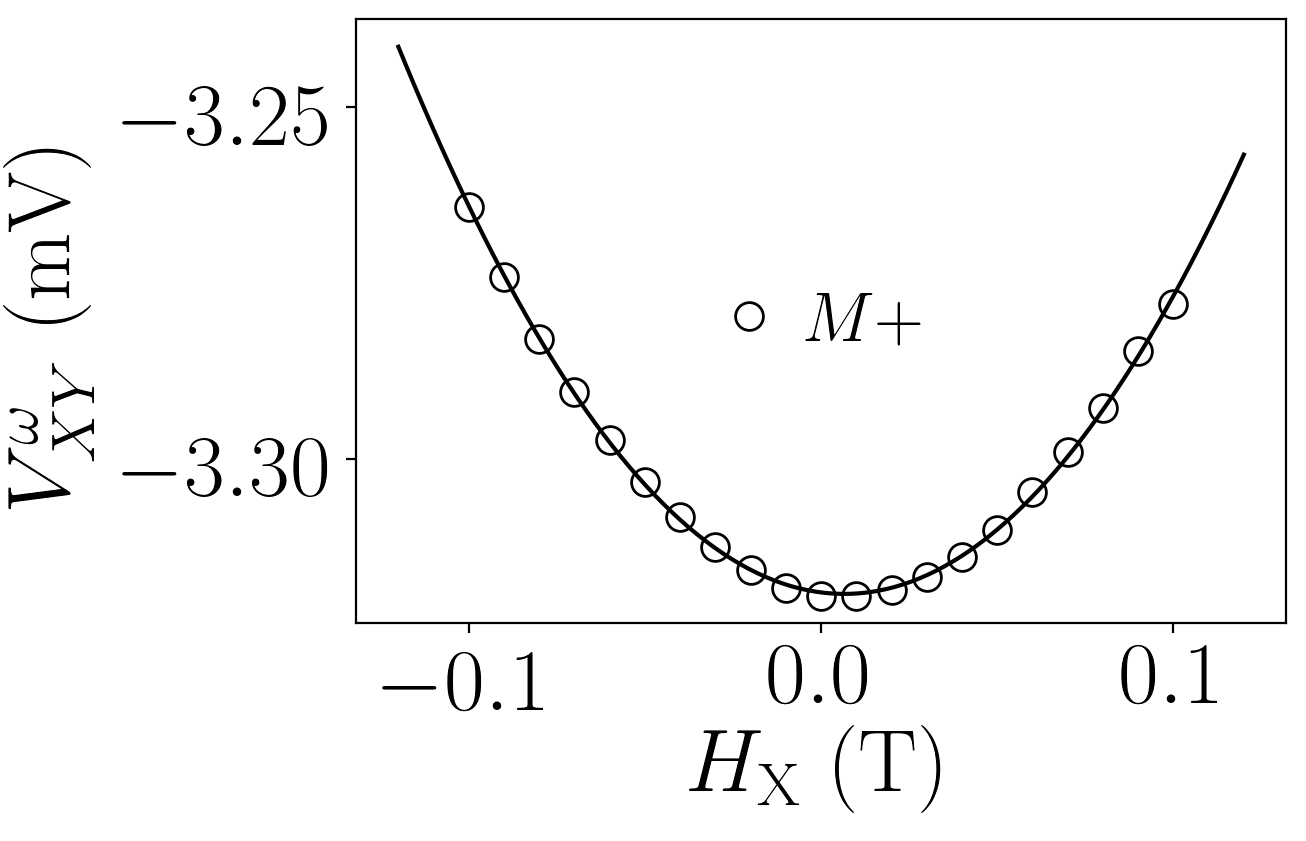

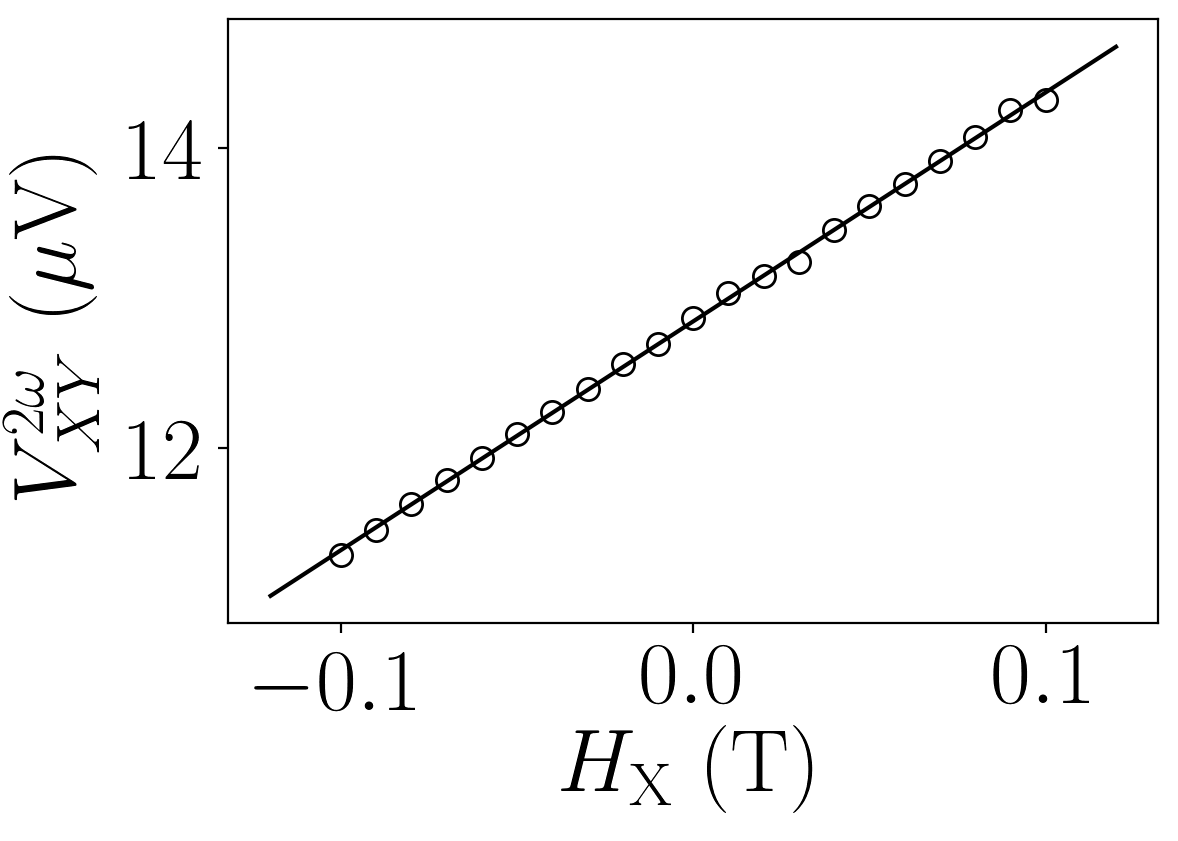

In [154]:
def plot_parab(tech,m,ang,v,newfig=False,fit=False,**kwargs):
    if tech == 'optics':
        comp = 'ThetaK'
        fit_ds = op_w1_fit.sel(M=m,field_azimuth=ang)
        fac=-1
    if tech == 'xport':
        comp = 'TX1'
        fit_ds = xport_w1_fit.sel(M=m,field_azimuth=ang)
        fac =1
    if m == 1:
        label = '$M+$'
        color = 'C0'
    else:
        label = '$M-$'
        color = 'C1'
    if newfig:
        plt.figure(dpi=200)
    plt.errorbar(a.sweep_field,fac*a.sel(M=m,field_azimuth=ang)[comp]*1e3,
                 ms=10,fillstyle='none',label=label,color = color,**kwargs)
    if tech == 'optics':
        plt.ylabel('$\\theta_k$ (mRad)')
    if tech == 'xport':
        plt.ylabel('$V^{\omega}_{XY}$ (mV)')
    if ang == 90:
        plt.xlabel('$H_{\\rm{X}}$ (T)')
    if ang == 0:
        plt.xlabel('$H_{\\rm{Y}}$ (T)')
    
    if fit:
        xx = np.linspace(-0.12,0.12,100)
        plt.errorbar(xx,fac*1e3*quad(xx,
                         fit_ds.a.values,
                         fit_ds.b.values,
                         fit_ds.c.values),color = color)
    
def plot_lin(tech,m,ang,v,newfig=False,fit=False,off=0,**kwargs):
    if tech == 'optics':
        comp = 'DeltaThetaK'
        fac = -1
        fit_ds = op_w2_fit.sel(M=m,field_azimuth=ang)
        if ang == 90:
            fac *= -1
    if tech == 'xport':
        comp = 'TY2'
        fac = 1
        fit_ds = xport_w2_fit.sel(M=m,field_azimuth=ang)
    if m == 1:
        label = '$M+$'
        color = 'C0'
    else:
        label = '$M-$'
        color = 'C1'
    if newfig:
        plt.figure(dpi=200)
    plt.errorbar(a.sweep_field,fac*a.sel(M=m,field_azimuth=ang)[comp]*1e6 + off,
                 ms=8,fillstyle='none',label=label,color = color,**kwargs)
    plt.ylabel('$\\Delta\\theta_k$ ($\\mu$Rad)')
    if ang == 90:
        plt.xlabel('$H_{\\rm{X}}$ (T)')
    if ang == 0:
        plt.xlabel('$H_{\\rm{Y}}$ (T)')
    if tech == 'optics':
        plt.ylabel('$\\Delta\\theta_k$ ($\\mu$Rad)')
    if tech == 'xport':
        plt.ylabel('$V^{2\omega}_{XY}$ ($\\mu$V)')
    if fit:
        xx = np.linspace(-0.12,0.12,100)
        plt.errorbar(xx,fac*1e6*lin(xx,
                         fit_ds.a.values,
                         fit_ds.b.values)+off,color = color)
    

plot_parab('xport',1,90,3,newfig=True,fit=True,fmt='o')
plt.legend(loc='center',bbox_to_anchor=(0.5,0.5),
           frameon=False, columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=25)
plot_lin('xport',1,90,3,newfig=True,fit=True,off=10,fmt='o')
# plt.legend(loc='center',bbox_to_anchor=(0.5,0.5),
#            frameon=False, columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=25)

# plot_parab(1,90,newfig=True,color='C0',fmt='o')
# plot_parab(-1,90,color='C1',fmt='o')


In [159]:
xport_Meff = float(1/np.sqrt(abs(xport_w1_fit.a*2/Rahe/(3/R))).mean())


print(xport_Meff)

0.6318643922226775


In [52]:
op_SOT = op_w2_fit.a/op_w1_fit.a/2
op_SOT.name = 'H'
op_SOT_err = op_w2_fit.a/op_w1_fit.a/2*np.sqrt((op_w2_fit.a_err/op_w2_fit.a)**2 +\
                                               (op_w1_fit.a_err/op_w1_fit.a)**2)
op_SOT_err.name = 'H_err'
op_SOT = xr.merge([op_SOT,op_SOT_err])
op_SOT = op_SOT.assign(H_norm = lambda x: x.H*A*1e4/(x.applied_voltage/R * Isplit))
op_SOT = op_SOT.assign(H_norm_err = lambda x: x.H_err*A*1e4/(x.applied_voltage/R * Isplit))

op_SOT

<xarray.Dataset>
Dimensions:          (M: 2, applied_voltage: 11, field_azimuth: 2)
Coordinates:
  * field_azimuth    (field_azimuth) int64 0 90
  * M                (M) int64 -1 1
  * applied_voltage  (applied_voltage) float64 2.0 2.5 3.0 3.5 ... 6.0 6.5 7.0
Data variables:
    H                (applied_voltage, M, field_azimuth) float64 -0.0003392 ....
    H_err            (applied_voltage, M, field_azimuth) float64 -0.0001596 ....
    H_norm           (applied_voltage, M, field_azimuth) float64 -1.003e-06 ....
    H_norm_err       (applied_voltage, M, field_azimuth) float64 -4.72e-07 .....

In [61]:
xi = Rphe/Rahe
xport_SOT = -xport_w2_fit.a/xport_w1_fit.a # no factor of 2 therefore no multiply by 2 at the end
xport_SOT.name = 'H'
xport_SOT_err = xport_w2_fit.a/xport_w1_fit.a*np.sqrt((xport_w2_fit.a_err/xport_w2_fit.a)**2 +\
                                                      (xport_w1_fit.a_err/xport_w1_fit.a)**2)
xport_SOT_err.name = 'H_err'
xport_SOT = xr.merge([xport_SOT,xport_SOT_err])
xport_SOT = xport_SOT.assign(H_norm = lambda x: x.H*A*1e4/(x.applied_voltage/R * Isplit))
xport_SOT = xport_SOT.assign(H_norm_err = lambda x: x.H_err*A*1e4/(x.applied_voltage/R * Isplit))

xport_SOT_PHC = xport_w2_fit.a/xport_w1_fit.a/2
xport_SOT_PHC.name = 'H'
xport_SOT_PHC_err = xport_w2_fit.a/xport_w1_fit.a/2*np.sqrt((xport_w2_fit.a_err/xport_w2_fit.a)**2 +\
                                                      (xport_w1_fit.a_err/xport_w1_fit.a)**2)
xport_SOT_PHC_err.name = 'H_err'
xport_SOT_PHC = xr.merge([xport_SOT_PHC,xport_SOT_PHC_err])
xport_SOT_PHC = combine_new_dim({
    90: -2*(xport_SOT_PHC.H.sel(field_azimuth=90) + xi*xport_SOT_PHC.M*xport_SOT_PHC.H.sel(field_azimuth=0))\
           /(1-xi**2),
    0: -2*(xport_SOT_PHC.H.sel(field_azimuth=0) + xi*xport_SOT_PHC.M*xport_SOT_PHC.H.sel(field_azimuth=90))\
           /(1-xi**2)}, 'field_azimuth')
xport_SOT_PHC.name = 'H'
xport_SOT_PHC_err = 2*xport_SOT_PHC_err/(1-xi**2)
xport_SOT_PHC_err.name = 'H_err'
xport_SOT_PHC = xr.merge([xport_SOT_PHC,xport_SOT_PHC_err])

xport_SOT_PHC = xport_SOT_PHC.assign(H_norm = lambda x: x.H*A*1e4/(x.applied_voltage/R * Isplit))
xport_SOT_PHC = xport_SOT_PHC.assign(H_norm_err = lambda x: x.H_err*A*1e4/(x.applied_voltage/R * Isplit))

xport_SOT = combine_new_dim({'noPHC':xport_SOT,'PHC':xport_SOT_PHC},'PHC')

xport_SOT

<xarray.Dataset>
Dimensions:          (M: 2, PHC: 2, applied_voltage: 11, field_azimuth: 2)
Coordinates:
  * field_azimuth    (field_azimuth) int64 0 90
  * M                (M) int64 -1 1
  * applied_voltage  (applied_voltage) float64 2.0 2.5 3.0 3.5 ... 6.0 6.5 7.0
  * PHC              (PHC) <U5 'noPHC' 'PHC'
Data variables:
    H                (PHC, applied_voltage, M, field_azimuth) float64 0.00049...
    H_err            (PHC, applied_voltage, M, field_azimuth) float64 -2.02e-...
    H_norm           (PHC, applied_voltage, M, field_azimuth) float64 1.463e-...
    H_norm_err       (PHC, applied_voltage, M, field_azimuth) float64 -5.973e...

In [62]:
def slope(x,m):
    return m*x
def slope_guess(*args,**kwargs):
    return [1]
op_SOT_lin_fit = fit_dataArray(op_SOT.H*1e4,slope,slope_guess,['m'],'applied_voltage',
                               yerr_da=op_SOT.H_err*1e4,
                               xda = op_SOT.applied_voltage/R/A * Isplit)
xport_SOT_lin_fit = fit_dataArray(xport_SOT.H*1e4,slope,slope_guess,['m'],'applied_voltage',
                               yerr_da=xport_SOT.H_err*1e4,
                               xda = xport_SOT.applied_voltage/R/A * Isplit, 
                               applied_voltage = [x for x in xport_SOT.applied_voltage if x < 5])

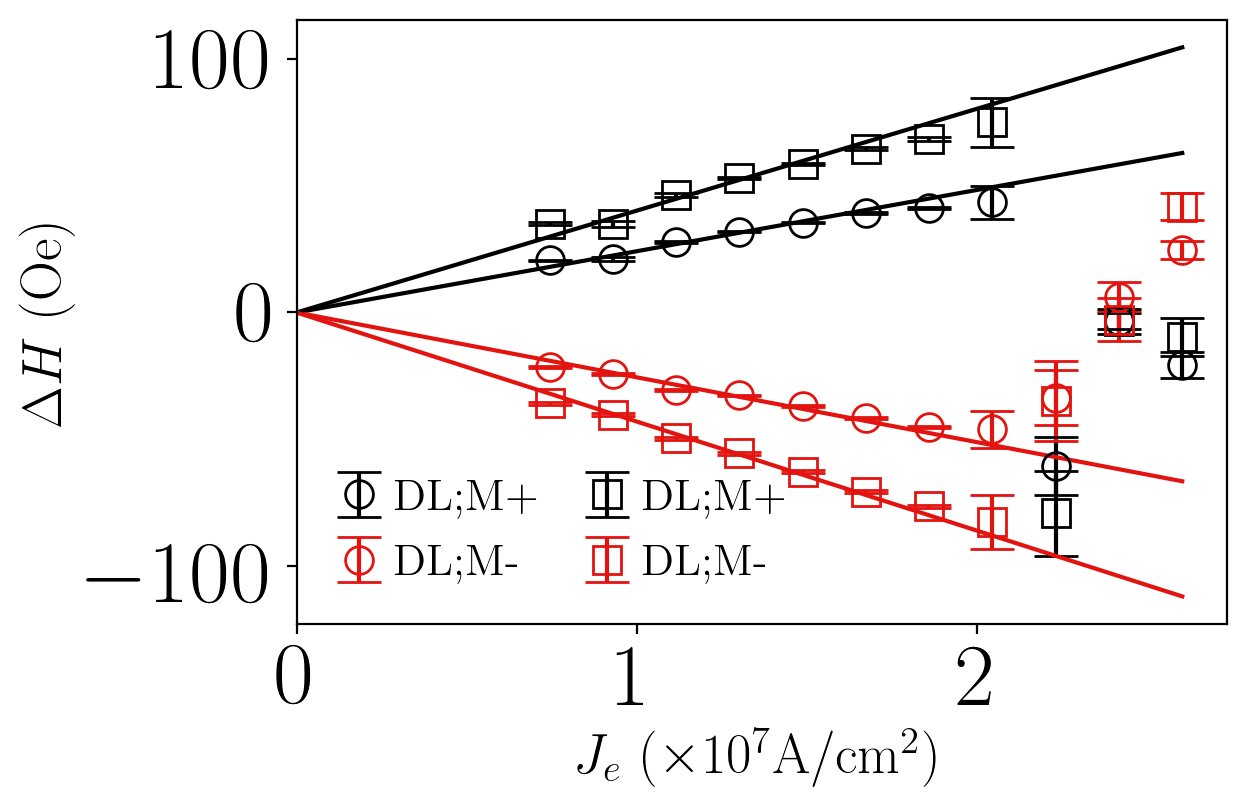

In [63]:
plt.figure(dpi=200)
plt.errorbar(xport_SOT.applied_voltage/R/A*1e-7,
             xport_SOT.sel(field_azimuth=90,M=1,PHC='noPHC').H*1e4,
             xport_SOT.sel(field_azimuth=90,M=1,PHC='noPHC').H_err*1e4,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
             label='DL;M+')
plt.plot(np.linspace(0,7,2)/R/A*1e-7,
         xport_SOT_lin_fit.sel(field_azimuth=90,M=1,PHC='noPHC').m.values*np.linspace(0,7,2)/R/A * Isplit,'C0')

plt.errorbar(xport_SOT.applied_voltage/R/A*1e-7,
             xport_SOT.sel(field_azimuth=90,M=-1,PHC='noPHC').H*1e4,
             xport_SOT.sel(field_azimuth=90,M=-1,PHC='noPHC').H_err*1e4,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
             label='DL;M-')
plt.plot(np.linspace(0,7,2)/R/A*1e-7,
         xport_SOT_lin_fit.sel(field_azimuth=90,M=-1,PHC='noPHC').m.values*np.linspace(0,7,2)/R/A * Isplit,'C1')

plt.errorbar(xport_SOT.applied_voltage/R/A*1e-7,
             xport_SOT.sel(field_azimuth=90,M=1,PHC='PHC').H*1e4,
             xport_SOT.sel(field_azimuth=90,M=1,PHC='PHC').H_err*1e4,
             fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
             label='DL;M+')
plt.plot(np.linspace(0,7,2)/R/A*1e-7,
         xport_SOT_lin_fit.sel(field_azimuth=90,M=1,PHC='PHC').m.values*np.linspace(0,7,2)/R/A * Isplit,'C0')

plt.errorbar(xport_SOT.applied_voltage/R/A*1e-7,
             xport_SOT.sel(field_azimuth=90,M=-1,PHC='PHC').H*1e4,
             xport_SOT.sel(field_azimuth=90,M=-1,PHC='PHC').H_err*1e4,
             fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
             label='DL;M-')
plt.plot(np.linspace(0,7,2)/R/A*1e-7,
         xport_SOT_lin_fit.sel(field_azimuth=90,M=-1,PHC='PHC').m.values*np.linspace(0,7,2)/R/A * Isplit,'C1')

# plt.errorbar(xport_SOT.applied_voltage/R/A*1e-7,
#              xport_SOT.sel(field_azimuth=0,M=1,PHC='noPHC').H*1e4,
#              xport_SOT.sel(field_azimuth=0,M=1,PHC='noPHC').H_err*1e4,
#              fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
#              label='FL;M+')
# plt.plot(np.linspace(0,7,2)/R/A*1e-7,
#          xport_SOT_lin_fit.sel(field_azimuth=0,M=1,PHC='noPHC').m.values*np.linspace(0,7,2)/R/A * Isplit,'C0')

# plt.errorbar(xport_SOT.applied_voltage/R/A*1e-7,
#              xport_SOT.sel(field_azimuth=0,M=-1,PHC='noPHC').H*1e4,
#              xport_SOT.sel(field_azimuth=0,M=-1,PHC='noPHC').H_err*1e4,
#              fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
#              label='FL;M-')
# plt.plot(np.linspace(0,7,2)/R/A*1e-7,
#          xport_SOT_lin_fit.sel(field_azimuth=0,M=-1,PHC='noPHC').m.values*np.linspace(0,7,2)/R/A * Isplit,'C1')
plt.xlim(0,)
# plt.ylim(0,)
plt.ylabel('$\\Delta H$ (Oe)',fontsize=20)
plt.xlabel('$J_e$ ($\\times 10^{7}$A/cm$^2$)',fontsize=20)

plt.legend(loc='lower left',bbox_to_anchor=(0,0),ncol=2,frameon=False,
           columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=16)

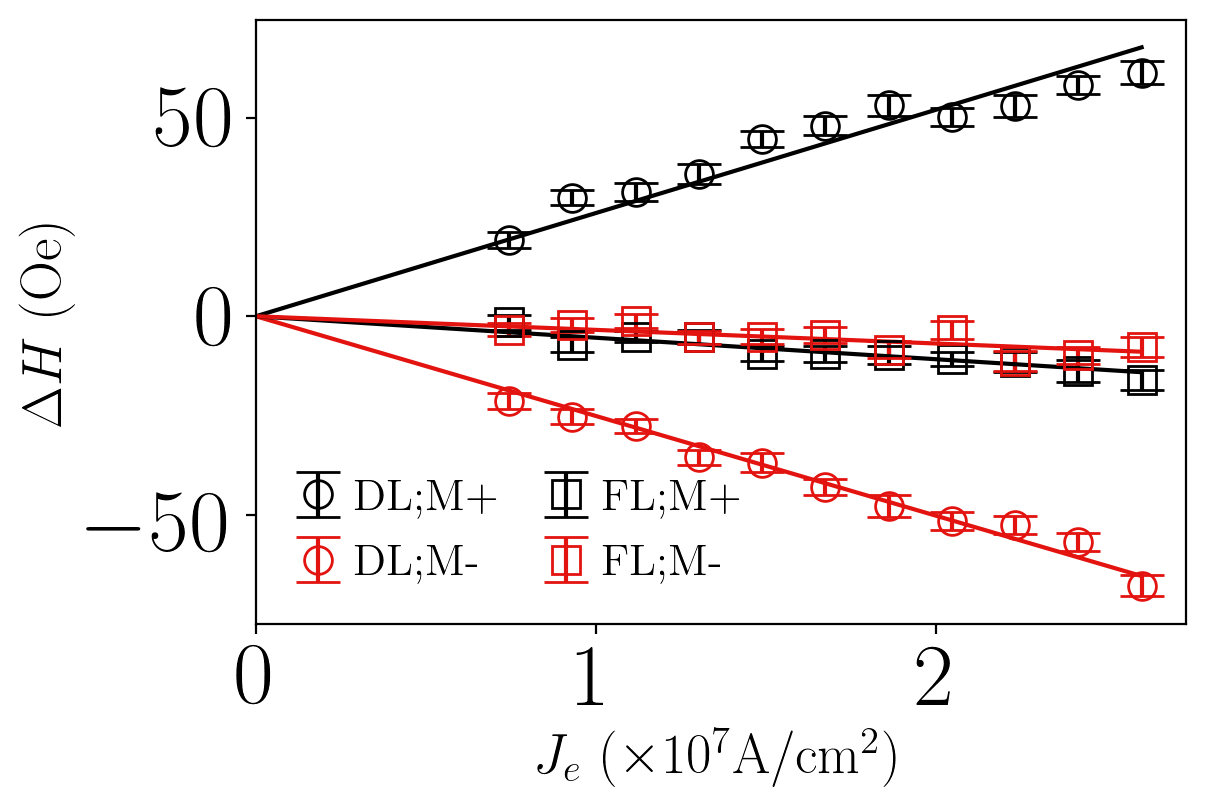

In [64]:
plt.figure(dpi=200)
plt.errorbar(op_SOT.applied_voltage/R/A*1e-7,
             op_SOT.sel(field_azimuth=90,M=1).H*1e4,
             op_SOT.sel(field_azimuth=90,M=1).H_err*1e4,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
             label='DL;M+')
plt.plot(np.linspace(0,7,2)/R/A*1e-7,
         op_SOT_lin_fit.sel(field_azimuth=90,M=1).m.values*np.linspace(0,7,2)/R/A * Isplit,'C0')

plt.errorbar(op_SOT.applied_voltage/R/A*1e-7,
             op_SOT.sel(field_azimuth=90,M=-1).H*1e4,
             op_SOT.sel(field_azimuth=90,M=-1).H_err*1e4,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
             label='DL;M-')
plt.plot(np.linspace(0,7,2)/R/A*1e-7,
         op_SOT_lin_fit.sel(field_azimuth=90,M=-1).m.values*np.linspace(0,7,2)/R/A * Isplit,'C1')

plt.errorbar(op_SOT.applied_voltage/R/A*1e-7,
             op_SOT.sel(field_azimuth=0,M=1).H*1e4,
             op_SOT.sel(field_azimuth=0,M=1).H_err*1e4,
             fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
             label='FL;M+')
plt.plot(np.linspace(0,7,2)/R/A*1e-7,
         op_SOT_lin_fit.sel(field_azimuth=0,M=1).m.values*np.linspace(0,7,2)/R/A * Isplit,'C0')

plt.errorbar(op_SOT.applied_voltage/R/A*1e-7,
             op_SOT.sel(field_azimuth=0,M=-1).H*1e4,
             op_SOT.sel(field_azimuth=0,M=-1).H_err*1e4,
             fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
             label='FL;M-')
plt.plot(np.linspace(0,7,2)/R/A*1e-7,
         op_SOT_lin_fit.sel(field_azimuth=0,M=-1).m.values*np.linspace(0,7,2)/R/A * Isplit,'C1')
plt.xlim(0,)
# plt.ylim(0,)
plt.ylabel('$\\Delta H$ (Oe)',fontsize=20)
plt.xlabel('$J_e$ ($\\times 10^{7}$A/cm$^2$)',fontsize=20)

plt.legend(loc='lower left',bbox_to_anchor=(0,0),ncol=2,frameon=False,
           columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=16)

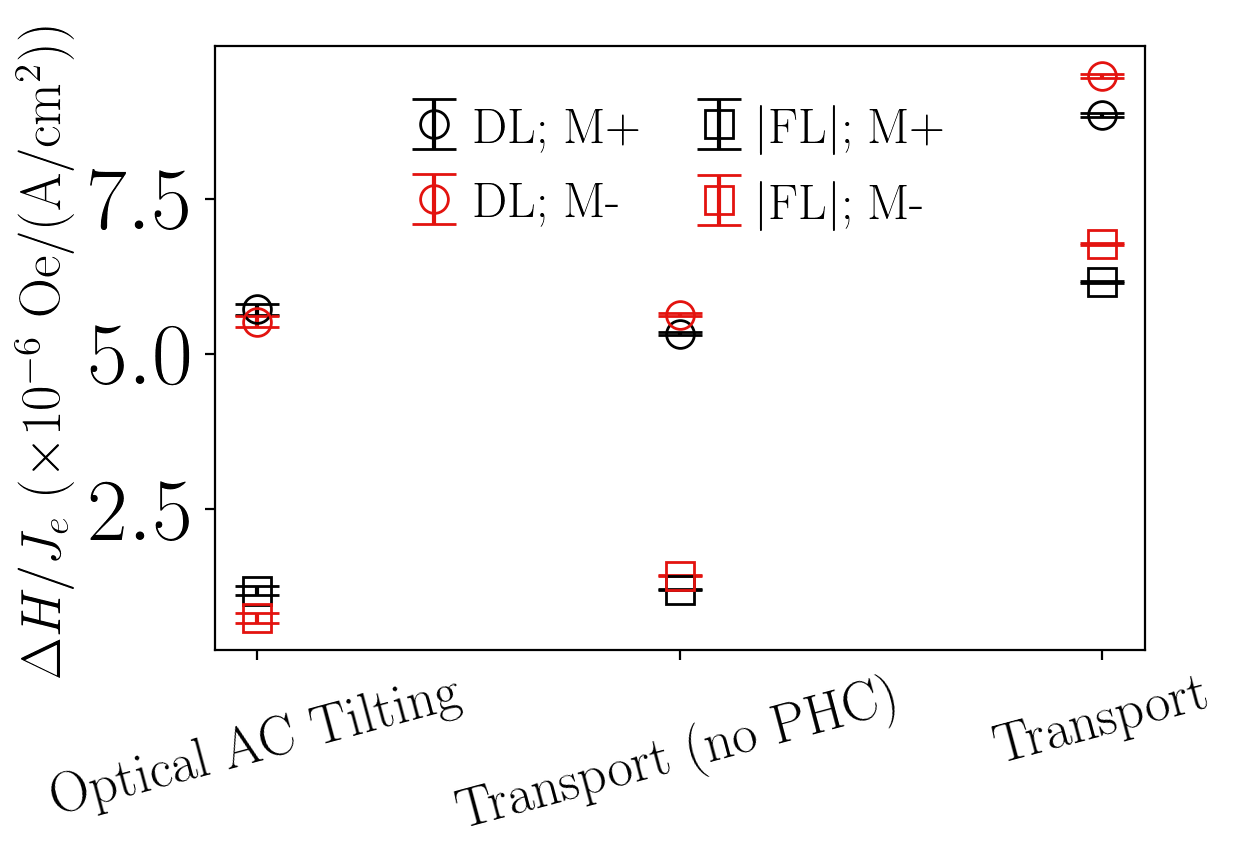

In [65]:
plt.figure(dpi=200)
plt.errorbar([0],op_SOT_lin_fit.sel(field_azimuth=90,M=1).m*1e6,
                 op_SOT_lin_fit.sel(field_azimuth=90,M=1).m_err*1e6,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
                 label='DL; M+')
plt.errorbar([0],-op_SOT_lin_fit.sel(field_azimuth=90,M=-1).m*1e6,
                 op_SOT_lin_fit.sel(field_azimuth=90,M=-1).m_err*1e6,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
                 label='DL; M-')

plt.errorbar([1],xport_SOT_lin_fit.sel(field_azimuth=90,M=1,PHC='noPHC').m*1e6,
                 xport_SOT_lin_fit.sel(field_azimuth=90,M=1,PHC='noPHC').m_err*1e6,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0')
plt.errorbar([1],-xport_SOT_lin_fit.sel(field_azimuth=90,M=-1,PHC='noPHC').m*1e6,
                 xport_SOT_lin_fit.sel(field_azimuth=90,M=-1,PHC='noPHC').m_err*1e6,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1')

plt.errorbar([2],xport_SOT_lin_fit.sel(field_azimuth=90,M=1,PHC='PHC').m*1e6,
                 xport_SOT_lin_fit.sel(field_azimuth=90,M=1,PHC='PHC').m_err*1e6,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0')
plt.errorbar([2],-xport_SOT_lin_fit.sel(field_azimuth=90,M=-1,PHC='PHC').m*1e6,
                 xport_SOT_lin_fit.sel(field_azimuth=90,M=-1,PHC='PHC').m_err*1e6,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1')

# ----- FL ---------#
#plt.figure(dpi=200)
plt.errorbar([0],abs(op_SOT_lin_fit.sel(field_azimuth=0,M=1).m*1e6),
                 op_SOT_lin_fit.sel(field_azimuth=0,M=1).m_err*1e6,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
                 label='$|$FL$|$; M+')
plt.errorbar([0],abs(op_SOT_lin_fit.sel(field_azimuth=0,M=-1).m*1e6),
                 op_SOT_lin_fit.sel(field_azimuth=0,M=-1).m_err*1e6,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
                 label='$|$FL$|$; M-')

plt.errorbar([1],abs(xport_SOT_lin_fit.sel(field_azimuth=0,M=1,PHC='noPHC').m*1e6),
                 xport_SOT_lin_fit.sel(field_azimuth=0,M=1,PHC='noPHC').m_err*1e6,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0')
plt.errorbar([1],abs(xport_SOT_lin_fit.sel(field_azimuth=0,M=-1,PHC='noPHC').m*1e6),
                 xport_SOT_lin_fit.sel(field_azimuth=0,M=-1,PHC='noPHC').m_err*1e6,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1')

plt.errorbar([2],abs(xport_SOT_lin_fit.sel(field_azimuth=0,M=1,PHC='PHC').m*1e6),
                 xport_SOT_lin_fit.sel(field_azimuth=0,M=1,PHC='PHC').m_err*1e6,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0')
plt.errorbar([2],abs(xport_SOT_lin_fit.sel(field_azimuth=0,M=-1,PHC='PHC').m*1e6),
                 xport_SOT_lin_fit.sel(field_azimuth=0,M=-1,PHC='PHC').m_err*1e6,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1')


plt.xticks([0,1,2],
           ['Optical AC Tilting','Transport (no PHC)','Transport'],
           rotation = 15,fontsize=20)
plt.ylabel('$\\Delta H/J_e$ ($\\times 10^{-6}$ Oe/(A/cm$^2))$',fontsize=20)
plt.legend(loc='center',bbox_to_anchor=(0.5,0.8),ncol=2,frameon=False,
           columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=18)

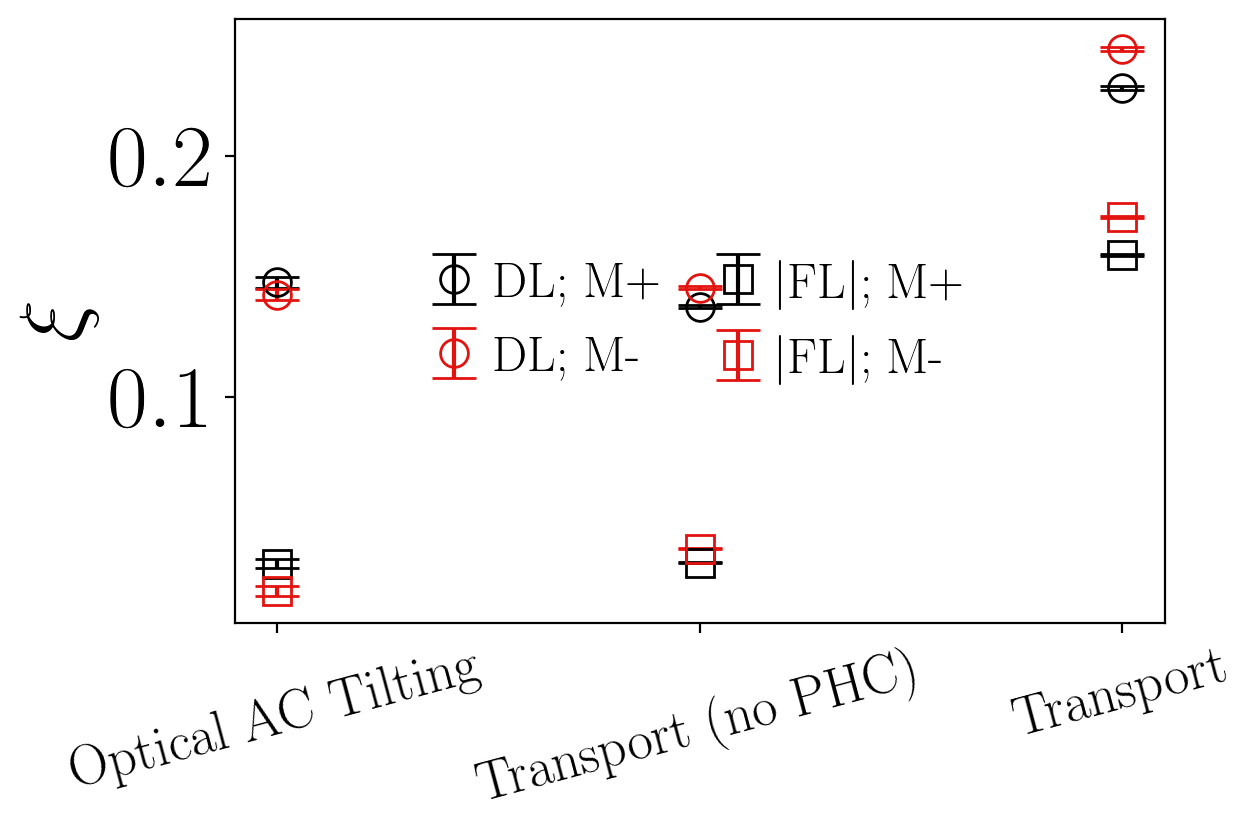

In [66]:
plt.figure(dpi=200)
plt.errorbar([0],op_SOT_lin_fit.sel(field_azimuth=90,M=1).m*t2xi/1e4,
                 op_SOT_lin_fit.sel(field_azimuth=90,M=1).m_err*t2xi/1e4,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
                 label='DL; M+')
plt.errorbar([0],-op_SOT_lin_fit.sel(field_azimuth=90,M=-1).m*t2xi/1e4,
                 op_SOT_lin_fit.sel(field_azimuth=90,M=-1).m_err*t2xi/1e4,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
                 label='DL; M-')

plt.errorbar([1],xport_SOT_lin_fit.sel(field_azimuth=90,M=1,PHC='noPHC').m*t2xi/1e4,
                 xport_SOT_lin_fit.sel(field_azimuth=90,M=1,PHC='noPHC').m_err*t2xi/1e4,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0')
plt.errorbar([1],-xport_SOT_lin_fit.sel(field_azimuth=90,M=-1,PHC='noPHC').m*t2xi/1e4,
                 xport_SOT_lin_fit.sel(field_azimuth=90,M=-1,PHC='noPHC').m_err*t2xi/1e4,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1')

plt.errorbar([2],xport_SOT_lin_fit.sel(field_azimuth=90,M=1,PHC='PHC').m*t2xi/1e4,
                 xport_SOT_lin_fit.sel(field_azimuth=90,M=1,PHC='PHC').m_err*t2xi/1e4,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0')
plt.errorbar([2],-xport_SOT_lin_fit.sel(field_azimuth=90,M=-1,PHC='PHC').m*t2xi/1e4,
                 xport_SOT_lin_fit.sel(field_azimuth=90,M=-1,PHC='PHC').m_err*t2xi/1e4,
                 fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1')

# ----- FL ---------#
#plt.figure(dpi=200)
plt.errorbar([0],abs(op_SOT_lin_fit.sel(field_azimuth=0,M=1).m*t2xi/1e4),
                 op_SOT_lin_fit.sel(field_azimuth=0,M=1).m_err*t2xi/1e4,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
                 label='$|$FL$|$; M+')
plt.errorbar([0],abs(op_SOT_lin_fit.sel(field_azimuth=0,M=-1).m*t2xi/1e4),
                 op_SOT_lin_fit.sel(field_azimuth=0,M=-1).m_err*t2xi/1e4,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
                 label='$|$FL$|$; M-')

plt.errorbar([1],abs(xport_SOT_lin_fit.sel(field_azimuth=0,M=1,PHC='noPHC').m*t2xi/1e4),
                 xport_SOT_lin_fit.sel(field_azimuth=0,M=1,PHC='noPHC').m_err*t2xi/1e4,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0')
plt.errorbar([1],abs(xport_SOT_lin_fit.sel(field_azimuth=0,M=-1,PHC='noPHC').m*t2xi/1e4),
                 xport_SOT_lin_fit.sel(field_azimuth=0,M=-1,PHC='noPHC').m_err*t2xi/1e4,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1')

plt.errorbar([2],abs(xport_SOT_lin_fit.sel(field_azimuth=0,M=1,PHC='PHC').m*t2xi/1e4),
                 xport_SOT_lin_fit.sel(field_azimuth=0,M=1,PHC='PHC').m_err*t2xi/1e4,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0')
plt.errorbar([2],abs(xport_SOT_lin_fit.sel(field_azimuth=0,M=-1,PHC='PHC').m*t2xi/1e4),
                 xport_SOT_lin_fit.sel(field_azimuth=0,M=-1,PHC='PHC').m_err*t2xi/1e4,
                 fmt='s',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1')


plt.xticks([0,1,2],
           ['Optical AC Tilting','Transport (no PHC)','Transport'],
           rotation = 15,fontsize=20)
plt.ylabel('$\\xi$')
plt.legend(loc='center',bbox_to_anchor=(0.5,0.5),ncol=2,frameon=False,
           columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=18)

In [83]:
np.abs(xport_SOT_lin_fit.m).mean('M').sel(PHC='noPHC').sel(field_azimuth=0)/\
np.abs(xport_SOT_lin_fit.m).mean('M').sel(PHC='noPHC').sel(field_azimuth=90)

<xarray.DataArray 'm' ()>
array(0.24037257)
Coordinates:
    PHC      <U5 'noPHC'

In [67]:
(op_SOT_lin_fit.fit_ds*t2xi/1e4).to_netcdf('./../all_devs/Meff%0.3f_op.nc'%np.mean([optics_Meff,xport_Meff]))
(xport_SOT_lin_fit.fit_ds*t2xi/1e4).to_netcdf('./../all_devs/Meff%0.3f_xport.nc'%np.mean([optics_Meff,xport_Meff]))
np.save('./../all_devs/Meff%0.3f_xi'%np.mean([optics_Meff,xport_Meff]), [xi])

## NIST Method

In [1]:
Cahe = -(xport_w2_fit.where(xport_w2_fit.applied_voltage<5,drop=True).applied_voltage/R)*Rahe/2/xport_Meff**2
Cphe = -(xport_w2_fit.where(xport_w2_fit.applied_voltage<5,drop=True).applied_voltage/R)*Rphe/2/xport_Meff**2
Spx = xport_w2_fit.where(xport_w2_fit.applied_voltage<5,drop=True).sel(M=1,field_azimuth=90).a
Spx_err = xport_w2_fit.where(xport_w2_fit.applied_voltage<5,drop=True).sel(M=1,field_azimuth=90).a_err
Spy = xport_w2_fit.where(xport_w2_fit.applied_voltage<5,drop=True).sel(M=1,field_azimuth=0).a
Spy_err = xport_w2_fit.where(xport_w2_fit.applied_voltage<5,drop=True).sel(M=1,field_azimuth=0).a_err
Smx = xport_w2_fit.where(xport_w2_fit.applied_voltage<5,drop=True).sel(M=-1,field_azimuth=90).a
Smx_err = xport_w2_fit.where(xport_w2_fit.applied_voltage<5,drop=True).sel(M=-1,field_azimuth=90).a_err
Smy = xport_w2_fit.where(xport_w2_fit.applied_voltage<5,drop=True).sel(M=-1,field_azimuth=0).a
Smy_err = xport_w2_fit.where(xport_w2_fit.applied_voltage<5,drop=True).sel(M=-1,field_azimuth=0).a_err

xport_SOT = xport_SOT.where(xport_SOT.applied_voltage < 5,drop=True)

C = 1/(2*Cahe**2 - 2*Cphe**2)

hx = 1e4*C*(-Cahe*Spx - Cahe*Smx - Cphe*Spy + Cphe*Smy)
hx_err = 1e4*C*(np.sqrt((Cahe*Spx_err)**2 + (Cahe*Smx_err)**2 + (Cphe*Spy_err)**2 + (Cphe*Smy_err)**2))
hy = 1e4*C*(-Cphe*Spx - Cphe*Smx - Cahe*Spy + Cahe*Smy)
hy_err = 1e4*C*(np.sqrt((Cphe*Spx_err)**2 + (Cphe*Smx_err)**2 + (Cahe*Spy_err)**2 + (Cahe*Smy_err)**2))

hxpar = (Smx - Spx)/2/Cahe*1e4
hxpar_err = np.sqrt(Smx_err**2 + Spx_err**2)/2/Cahe*1e4
hypar = (Smx + Spx)/2/Cphe*1e4
hypar_err = np.sqrt(Smx_err**2 + Spx_err**2)/2/Cphe*1e4
hxperp = -(Smy + Spy)/2/Cphe*1e4
hxperp_err = np.sqrt(Smy_err**2 + Spy_err**2)/2/Cphe*1e4
hyperp = (Smy - Spy)/2/Cahe*1e4
hyperp_err = np.sqrt(Smy_err**2 + Spy_err**2)/2/Cahe*1e4

#====================================


plt.figure(dpi=200)
plt.errorbar(hx.applied_voltage/R/A*1e-7,hx,hx_err,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
             label='NIST $\\Delta H$')

fit = fit_dataArray(hx,slope,slope_guess,['m'], xname='applied_voltage',
                    xda=hx.applied_voltage/R/A*1e-7,
                    yerr_da = hx_err, 
                    applied_voltage = [x for x in hx.applied_voltage if x < 5])
plt.plot([0,2.2],fit.m.values*np.array([0,2.2]),'C0')

# plt.errorbar(hx.applied_voltage/R/A*1e-7,hxpar,hxpar_err,
#              fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
#              label='NIST $\\Delta H^{\\parallel}$')

# fit = fit_dataArray(hxpar,slope,slope_guess,['m'], xname='applied_voltage',
#                     xda=hx.applied_voltage/R/A*1e-7,
#                     yerr_da = hxpar_err, 
#                     applied_voltage = [x for x in hx.applied_voltage if x < 5])
# plt.plot([0,2.2],fit.m.values*np.array([0,2.2]),'C1')

# plt.errorbar(hx.applied_voltage/R/A*1e-7,abs(hxperp),hxperp_err,
#              fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C4',
#              label='NIST $\\Delta H^{\\perp}$')

plt.errorbar(xport_SOT.applied_voltage/R/A*1e-7,
             abs(xport_SOT.sel(field_azimuth=90,PHC='PHC')).mean('M').H*1e4,
             abs(xport_SOT.sel(field_azimuth=90,PHC='PHC')).mean('M').H_err*1e4,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C2',
             label='Hayashi; PHC')
fit = fit_dataArray(abs(xport_SOT.sel(field_azimuth=90,PHC='PHC')).mean('M').H*1e4,
                    slope,slope_guess,['m'], xname='applied_voltage',
                    xda=hx.applied_voltage/R/A*1e-7,
                    yerr_da = abs(xport_SOT.sel(field_azimuth=90,PHC='PHC')).mean('M').H_err*1e4, 
                    applied_voltage = [x for x in hx.applied_voltage if x < 5])
plt.plot([0,2.2],fit.m.values*np.array([0,2.2]),'C2')

plt.errorbar(xport_SOT.applied_voltage/R/A*1e-7,
             abs(xport_SOT.sel(field_azimuth=90,PHC='noPHC')).mean('M').H*1e4,
             abs(xport_SOT.sel(field_azimuth=90,PHC='noPHC')).mean('M').H_err*1e4,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C3',
             label='Hayashi; no PHC')
fit = fit_dataArray(abs(xport_SOT.sel(field_azimuth=90,PHC='noPHC')).mean('M').H*1e4,
                    slope,slope_guess,['m'], xname='applied_voltage',
                    xda=hx.applied_voltage/R/A*1e-7,
                    yerr_da = abs(xport_SOT.sel(field_azimuth=90,PHC='noPHC')).mean('M').H_err*1e4, 
                    applied_voltage = [x for x in hx.applied_voltage if x < 5])
plt.plot([0,2.2],fit.m.values*np.array([0,2.2]),'C3')

plt.xlabel('$J_e$ ($\\times 10^7$ A/cm$^2$)')
plt.ylabel('$\\Delta H_X$ (Oe)')
plt.legend(loc='upper left',bbox_to_anchor=(-0.01,1),ncol=2,frameon=False,
           columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=14)

#====================================

plt.figure(dpi=200)
plt.errorbar(hy.applied_voltage/R/A*1e-7,-hy,hy_err,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C0',
             label='NIST $\\Delta H$')

fit = fit_dataArray(-hy,slope,slope_guess,['m'], xname='applied_voltage',
                    xda=hy.applied_voltage/R/A*1e-7,
                    yerr_da = hy_err, 
                    applied_voltage = [x for x in hx.applied_voltage if x < 5])
plt.plot([0,2.2],fit.m.values*np.array([0,2.2]),'C0')

# plt.errorbar(hy.applied_voltage/R/A*1e-7,-hyperp,hyperp_err,
#              fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C1',
#              label='NIST $\\Delta H^{\\perp}$')

# fit = fit_dataArray(-hyperp,slope,slope_guess,['m'], xname='applied_voltage',
#                     xda=hy.applied_voltage/R/A*1e-7,
#                     yerr_da = hyperp_err, 
#                     applied_voltage = [x for x in hx.applied_voltage if x < 5])
# plt.plot([0,2.2],fit.m.values*np.array([0,2.2]),'C1')

# plt.errorbar(hy.applied_voltage/R/A*1e-7,hypar,hypar_err,
#              fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C4',
#              label='NIST $\\Delta H^{\\parallel}$')

plt.errorbar(xport_SOT.applied_voltage/R/A*1e-7,
             abs(xport_SOT.sel(field_azimuth=0,PHC='PHC')).mean('M').H*1e4,
             abs(xport_SOT.sel(field_azimuth=0,PHC='PHC')).mean('M').H_err*1e4,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C2',
             label='Hayashi; PHC')
fit = fit_dataArray(abs(xport_SOT.sel(field_azimuth=0,PHC='PHC')).mean('M').H*1e4,
                    slope,slope_guess,['m'], xname='applied_voltage',
                    xda=hx.applied_voltage/R/A*1e-7,
                    yerr_da = abs(xport_SOT.sel(field_azimuth=0,PHC='PHC')).mean('M').H_err*1e4, 
                    applied_voltage = [x for x in hx.applied_voltage if x < 5])
plt.plot([0,2.2],fit.m.values*np.array([0,2.2]),'C2')

plt.errorbar(xport_SOT.applied_voltage/R/A*1e-7,
             abs(xport_SOT.sel(field_azimuth=0,PHC='noPHC')).mean('M').H*1e4,
             abs(xport_SOT.sel(field_azimuth=0,PHC='noPHC')).mean('M').H_err*1e4,
             fmt='o',linestyle='none',ms=10,capsize=8,fillstyle='none',color = 'C3',
             label='Hayashi; no PHC')
fit = fit_dataArray(abs(xport_SOT.sel(field_azimuth=0,PHC='noPHC')).mean('M').H*1e4,
                    slope,slope_guess,['m'], xname='applied_voltage',
                    xda=hx.applied_voltage/R/A*1e-7,
                    yerr_da = abs(xport_SOT.sel(field_azimuth=0,PHC='noPHC')).mean('M').H_err*1e4, 
                    applied_voltage = [x for x in hx.applied_voltage if x < 5])
plt.plot([0,2.2],fit.m.values*np.array([0,2.2]),'C3')


plt.xlabel('$J_e$ ($\\times 10^7$ A/cm$^2$)')
plt.ylabel('$|\\Delta H_Y|$ (Oe)')
plt.legend(loc='upper left',bbox_to_anchor=(-0.01,1),ncol=2,frameon=False,
           columnspacing=1,handletextpad=0.3,handlelength=1,fontsize=14)

NameError: name 'xport_w2_fit' is not defined